## get the data df from csv

In [94]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

Soil_types_directory= 'C:/Users/user/Google Drive/TCD20/python/dataset/Soil types'
data_image=pd.read_csv(os.path.join(Soil_types_directory,'all_image_64.csv'))
data_image_mean=pd.read_csv(os.path.join(Soil_types_directory,'all_image_mean.csv'))
data_image_Selecting=pd.read_csv(os.path.join(Soil_types_directory,'Selecting_image_64.csv'))



data_image2=data_image.groupby(by=['classes']).sample(frac=0.1, random_state=42)
print(data_image2.shape)


x_data=data_image2[['r','g','b']]
y_data=data_image2['classes2']
print(y_data.unique())

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=42)
print(y_train.unique())
print(y_test.unique())

from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train,num_classes=5)
y_test_encoded = to_categorical(y_test,num_classes=5)
y_test_encoded.shape

(63897, 10)
[0 1 2 3 4]
[2 0 3 1 4]
[3 0 2 4 1]


(6390, 5)

## from df   fully connected network (FCNNs)

In [95]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

## Build the model
### Set up the layers

In [96]:
model = Sequential() 
model.add(Input(shape=(3,)))
model.add(Dense(16, activation='tanh'))
#model.add(Dropout(rate=0.2))
model.add(Dense(16, activation='tanh'))
model.add(Dense(5, activation='softmax'))
model.summary()


tf.keras.utils.plot_model(model, show_dtype=True, show_shapes=True, show_layer_names=True, to_file='model_1.png')


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 16)                64        
                                                                 
 dense_31 (Dense)            (None, 16)                272       
                                                                 
 dense_32 (Dense)            (None, 5)                 85        
                                                                 
Total params: 421
Trainable params: 421
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### Compile ane fit the model

In [99]:
optimizer = Adam(learning_rate=0.001)


early_stopping_monitor = EarlyStopping(
    monitor='accuracy',
    min_delta=0,
    patience=5,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
epochs=20
history=model.fit(X_train, y_train_encoded,
          validation_data=(X_test,y_test_encoded ),
          batch_size=10, epochs=epochs, verbose=True)





history_df=pd.DataFrame(history.history)
history_df


Epoch 1/20
5751/5751 [==============================] - 8s 1ms/step - loss: 1.6541 - accuracy: 0.2070 - val_loss: 1.6346 - val_accuracy: 0.1870
Epoch 2/20
5751/5751 [==============================] - 8s 1ms/step - loss: 1.6552 - accuracy: 0.2083 - val_loss: 1.6268 - val_accuracy: 0.1870
Epoch 3/20
5751/5751 [==============================] - 8s 1ms/step - loss: 1.6553 - accuracy: 0.2072 - val_loss: 1.6575 - val_accuracy: 0.1947
Epoch 4/20
5751/5751 [==============================] - 8s 1ms/step - loss: 1.6570 - accuracy: 0.2083 - val_loss: 1.8593 - val_accuracy: 0.1870
Epoch 5/20
5751/5751 [==============================] - 10s 2ms/step - loss: 1.6553 - accuracy: 0.2083 - val_loss: 1.6222 - val_accuracy: 0.2438
Epoch 6/20
5751/5751 [==============================] - 10s 2ms/step - loss: 1.6555 - accuracy: 0.2068 - val_loss: 1.6284 - val_accuracy: 0.1947
Epoch 7/20
5751/5751 [==============================] - 9s 1ms/step - loss: 1.6550 - accuracy: 0.2097 - val_loss: 1.6208 - val_accurac

,loss,accuracy,val_loss,val_accuracy
0,1.654149,0.207018,1.634582,0.187011
1,1.655240,0.208305,1.626792,0.187011
2,1.655312,0.207157,1.657495,0.194679
3,1.657044,0.208270,1.859261,0.187011
4,1.655340,0.208340,1.622186,0.243818
5,1.655521,0.206810,1.628394,0.194679
6,1.655028,0.209748,1.620750,0.243818
7,1.655287,0.205992,1.618259,0.191862
8,1.656384,0.207749,1.698527,0.243818
9,1.655293,0.209209,1.694192,0.243818


### Summary model results

200/200 [==============================] - 0s 982us/step


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


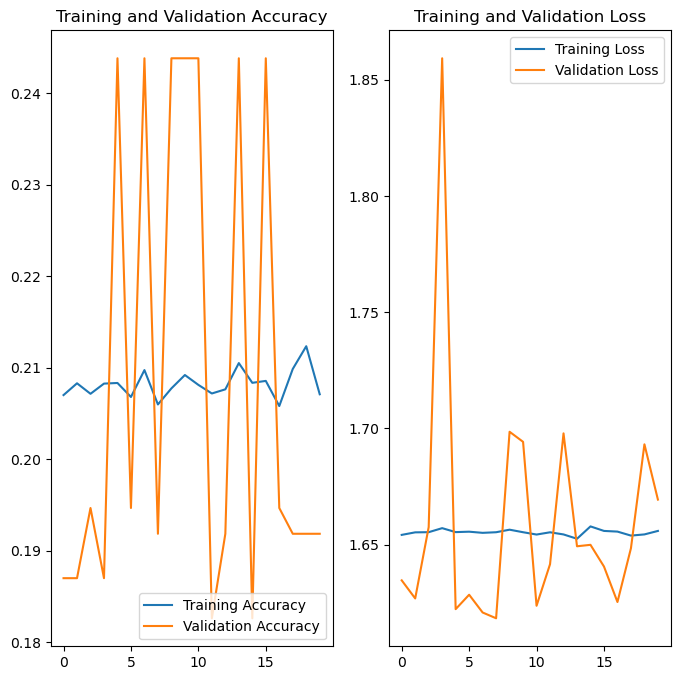

               precision
Laterite Soil   0.191862
accuracy        0.191862
macro avg       0.038372
weighted avg    0.036811
Black Soil      0.000000
Cinder Soil     0.000000
Peat Soil       0.000000
Yellow Soil     0.000000


{'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1558},
 '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1195},
 '2': {'precision': 0.1918622848200313,
  'recall': 1.0,
  'f1-score': 0.321953781512605,
  'support': 1226},
 '3': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1244},
 '4': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1167},
 'accuracy': 0.1918622848200313,
 'macro avg': {'precision': 0.038372456964006256,
  'recall': 0.2,
  'f1-score': 0.064390756302521,
  'support': 6390},
 'weighted avg': {'precision': 0.036811136336362814,
  'recall': 0.1918622848200313,
  'f1-score': 0.06177078812745755,
  'support': 6390}}

In [102]:
import matplotlib.pyplot as plt
from sklearn.metrics import  confusion_matrix,multilabel_confusion_matrix
from sklearn.metrics import classification_report
import numpy as np


def model_predict(model,X,Y,labels):
    # predict
    y_pred = model.predict(X)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

    # Calculate classification report
    classification_report1 = classification_report(Y, y_pred_classes,labels=labels,output_dict=True)
    # Calculate confusion_matrix
    multi_confusion_matrix1=multilabel_confusion_matrix(Y, y_pred_classes,labels=labels)
    confusion_matrix1= confusion_matrix(Y, y_pred_classes,labels=labels)
    
    return  classification_report1,  confusion_matrix1,multi_confusion_matrix1
 
   
def plot_model_results(model_history_df,epochs):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()


    

def model_summary(classification_report,multi_confusion_matrix,confusion_matrix,classes):
    
    # classification_report to DataFrame
    #required_fields=['Black Soil', 'Cinder Soil', 'Laterite Soil', 'Peat Soil', 'Yellow Soil','macro avg', 'weighted avg']#, 'weighted avg'
    required_fields=['0', '1', '2', '3', '4', 'macro avg', 'weighted avg']
    classification_report_dict={k:v['precision'] for k,v in classification_report.items() if k in required_fields}
    classification_report_dict2={k:v['support'] for k,v in classification_report.items() if k in required_fields}
    classification_report_dict.update({'accuracy':classification_report1['accuracy']})
    classification_report_df=pd.DataFrame(classification_report_dict,index=['precision']).T
    classification_report_df.index=['Black Soil', 'Cinder Soil', 'Laterite Soil', 'Peat Soil', 'Yellow Soil','macro avg', 'weighted avg','accuracy']
    classification_report_df= classification_report_df.sort_values(by = 'precision', ascending=False)#
    
    # confusion_matrix to  DataFrame
    dict_matrix=dict()
    for i,l in zip(range(multi_confusion_matrix.shape[0]),classes):
        cm=multi_confusion_matrix1[i,:,:]
        df_cm = pd.DataFrame(cm,index= ['other',l], columns=['other',l])
        #confusion_matrix, index=class_names, columns=class_names,
        dict_matrix.update({l:df_cm})
    
    classes=['Black Soil', 'Cinder Soil', 'Laterite Soil', 'Peat Soil', 'Yellow Soil']
    confusion_matrix_df= pd.DataFrame(confusion_matrix,index=classes, columns=classes)
    return classification_report_df, dict_matrix, confusion_matrix_df


labels=['Black Soil', 'Cinder Soil', 'Laterite Soil', 'Peat Soil', 'Yellow Soil']
labels=[0,1,2,3,4]

classification_report1,confusion_matrix1,multi_confusion_matrix1=model_predict(model,X_test, y_test,labels)
classification_report_df, dict_matrix, confusion_matrix_df=model_summary(classification_report1,multi_confusion_matrix1,confusion_matrix1,labels)
plot_model_results(history_df,epochs)


print(classification_report_df)
confusion_matrix_df
classification_report1#['support']

100/100 [==============================] - 0s 1ms/step
              precision
1              1.000000
4              0.643991
weighted avg   0.464981
macro avg      0.464593
2              0.391534
accuracy       0.343036
0              0.287441
3              0.000000


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Black Soil,Cinder Soil,Laterite Soil,Peat Soil,Yellow Soil
Black Soil,737,0,3,0,4
Cinder Soil,628,1,8,0,3
Laterite Soil,393,0,74,0,135
Peat Soil,556,0,23,0,15
Yellow Soil,250,0,81,0,284


## get the image data

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf


data_dir= 'C:/Users/user/Google Drive/TCD20/python/dataset/Soil types'


batch_size = 32
img_height = 180
img_width = 180

train_ds= tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names =image_soil.class_names
print(class_names)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
 

# from  image   Convolutional Neural Networks (CNNs)



In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Build the model
### Set up the layers

In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compile ane fit the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

### Summary model results

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(99):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])



model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


model.summary()

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()